<a href="https://colab.research.google.com/github/siamislam1603/Soft-Computing-Lab/blob/master/Deep%20Neural%20Network/170104124_exp_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import os
import cv2
%matplotlib inline

### Loading preprocessed training and test set from drive

In [ ]:
train_set_ds1=torch.load('/content/drive/MyDrive/Soft Computing Lab/training_set_a.pt')
test_set_ds1=torch.load('/content/drive/MyDrive/Soft Computing Lab/testing_set_a.pt')
train_set_ds1[0][0].shape,test_set_ds1[0][0].shape

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))

### Hyperparameters for DNN

### Six Layer FNN with ReLU Activation

In [ ]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.act_1 = nn.Tanh()
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.act_2 = nn.Tanh()
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.act_3 = nn.Tanh()
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.act_4 = nn.Tanh()
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        self.act_5 = nn.Tanh()
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.act_6 = nn.Tanh()
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        out  = self.linear_1(x)
        out = self.act_1(out)
        out  = self.linear_2(out)
        out = self.act_2(out)
        out  = self.linear_3(out)
        out = self.act_3(out)
        out  = self.linear_4(out)
        out = self.act_4(out)
        out  = self.linear_5(out)
        out = self.act_5(out)
        out  = self.linear_6(out)
        out = self.act_6(out)
        out  = self.linear_out(out)
        return out

In [ ]:
def cal_accuracy(applied_model,ds_test_loader):
  correct = 0
  total = 0
  for images, labels in ds_test_loader:
    images = images.view(-1, 28*28).to(device)
    outputs = applied_model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    if torch.cuda.is_available():
        correct += (predicted.cpu() == labels.cpu()).sum() 
    else:
        correct += (predicted == labels).sum()

  accuracy = 100 * correct.item() / total
  return accuracy

In [ ]:
def evaluate_model(applied_model,ds_train_loader,ds_test_loader,num_epochs):
  iter_loss=[]
  iter=0
  for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    for i, (images, labels) in enumerate(ds_train_loader):
      images = images.view(-1, 28*28).to(device)
      labels = labels.to(device)
      optimizer.zero_grad()
      outputs = applied_model(images) 
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      if iter % 100 == 0:
        accuracy=cal_accuracy(applied_model,ds_test_loader)
        print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
        iter_loss.append(loss.item())
      iter=iter+1
  return iter_loss

### Model Evaluation on `Dataset 1`

In [ ]:
batch_size = 32
num_iters = 95000
input_dim = 28*28
num_hidden = 200
output_dim = 10

learning_rate = 1e-4

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
g = torch.Generator()
g.manual_seed(42)
model_ds1 = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
model_ds1.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ds1.parameters(), lr=learning_rate)

train_loader_ds1 = torch.utils.data.DataLoader(dataset=train_set_ds1, 
                                           batch_size=batch_size, 
                                           shuffle=True,
                                           generator=g)

test_loader_ds1 = torch.utils.data.DataLoader(dataset=test_set_ds1, 
                                          batch_size=batch_size, 
                                          shuffle=False)

num_epochs_ds1 = num_iters / (len(train_set_ds1) / batch_size)
num_epochs_ds1 = int(num_epochs_ds1)
iter_loss_ds1=evaluate_model(model_ds1,train_loader_ds1,test_loader_ds1,num_epochs_ds1)

Epoch 1
-------------------------------
Iteration: 0. Loss: 2.300987720489502. Accuracy: 10.504947982745495
Iteration: 100. Loss: 2.294668674468994. Accuracy: 10.504947982745495
Iteration: 200. Loss: 2.314276695251465. Accuracy: 10.022836843440752
Iteration: 300. Loss: 2.2950570583343506. Accuracy: 10.707942146663283
Iteration: 400. Loss: 2.2990798950195312. Accuracy: 10.022836843440752
Epoch 2
-------------------------------
Iteration: 500. Loss: 2.3045878410339355. Accuracy: 9.109363105810708
Iteration: 600. Loss: 2.3104491233825684. Accuracy: 10.022836843440752
Iteration: 700. Loss: 2.314751625061035. Accuracy: 9.769094138543517
Iteration: 800. Loss: 2.2944839000701904. Accuracy: 10.428825171276326
Iteration: 900. Loss: 2.270723819732666. Accuracy: 11.139304744988582
Epoch 3
-------------------------------
Iteration: 1000. Loss: 2.3079416751861572. Accuracy: 9.261608728749048
Iteration: 1100. Loss: 2.271897554397583. Accuracy: 10.733316417153008
Iteration: 1200. Loss: 2.248671054840

In [ ]:
print(model_ds1)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (act_1): Tanh()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (act_2): Tanh()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (act_3): Tanh()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (act_4): Tanh()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (act_5): Tanh()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (act_6): Tanh()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)


In [ ]:
torch.save(model_ds1.state_dict(), '/content/drive/MyDrive/Soft Computing Lab/model_exp2_ds_a.pt')

### Iteration vs Loss graph

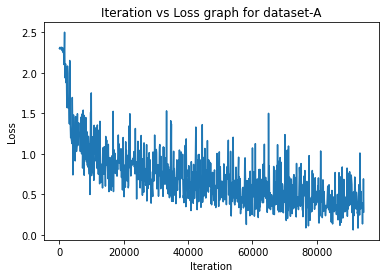

In [ ]:
iter_range=np.arange(0,94700,100)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Iteration vs Loss graph for dataset-A')
plt.plot(iter_range,iter_loss_ds1);

### Load the train and test set of dataset-2 from drive

In [ ]:
train_set_ds2=torch.load('/content/drive/MyDrive/Soft Computing Lab/training_set_2.pt')
test_set_ds2=torch.load('/content/drive/MyDrive/Soft Computing Lab/testing_set_2.pt')
train_set_ds2[0][0].shape,test_set_ds2[0][0].shape

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))

### Evaluate model on `Dataset 2`

In [ ]:
g = torch.Generator()
g.manual_seed(42)
model_ds2 = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
model_ds2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ds2.parameters(), lr=learning_rate)

train_loader_ds2 = torch.utils.data.DataLoader(dataset=train_set_ds2, 
                                           batch_size=batch_size, 
                                           shuffle=True,
                                           generator=g)

test_loader_ds2 = torch.utils.data.DataLoader(dataset=test_set_ds2, 
                                          batch_size=batch_size, 
                                          shuffle=False)

num_epochs_ds2 = num_iters / (len(train_set_ds2) / batch_size)
num_epochs_ds2 = int(num_epochs_ds2)
iter_loss_ds2=evaluate_model(model_ds2,train_loader_ds2,test_loader_ds2,num_epochs_ds2)

Epoch 1
-------------------------------
Iteration: 0. Loss: 2.3124630451202393. Accuracy: 10.0
Iteration: 100. Loss: 1.230684757232666. Accuracy: 47.63
Iteration: 200. Loss: 0.9441340565681458. Accuracy: 59.89
Iteration: 300. Loss: 1.1022429466247559. Accuracy: 66.2
Iteration: 400. Loss: 0.7023475170135498. Accuracy: 69.92
Iteration: 500. Loss: 1.121370553970337. Accuracy: 72.91
Iteration: 600. Loss: 0.5624690055847168. Accuracy: 73.33
Iteration: 700. Loss: 0.44508665800094604. Accuracy: 75.9
Iteration: 800. Loss: 0.540910005569458. Accuracy: 77.95
Iteration: 900. Loss: 0.6426400542259216. Accuracy: 78.73
Iteration: 1000. Loss: 0.4541211724281311. Accuracy: 79.71
Iteration: 1100. Loss: 1.1283775568008423. Accuracy: 79.81
Iteration: 1200. Loss: 0.8185717463493347. Accuracy: 79.63
Iteration: 1300. Loss: 0.3994275629520416. Accuracy: 80.46
Iteration: 1400. Loss: 0.9227643609046936. Accuracy: 81.63
Iteration: 1500. Loss: 0.5264735817909241. Accuracy: 80.97
Iteration: 1600. Loss: 0.44603604

### Plot Loss vs Iteration graph for `Dataset-2`

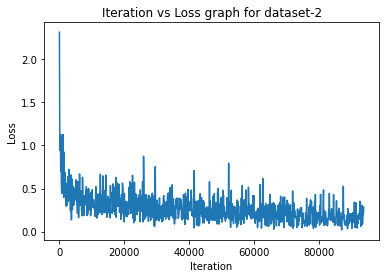

In [ ]:
iter_range=np.arange(0,93800,100)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Iteration vs Loss graph for dataset-2')
plt.plot(iter_range,iter_loss_ds2);

In [ ]:
print(model_ds2)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (act_1): Tanh()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (act_2): Tanh()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (act_3): Tanh()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (act_4): Tanh()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (act_5): Tanh()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (act_6): Tanh()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)


In [ ]:
torch.save(model_ds2.state_dict(), '/content/drive/MyDrive/Soft Computing Lab/model_exp2_ds_2.pt')